<a href="https://colab.research.google.com/github/sheriff18/Data-Science/blob/main/Sideline%20Accuracy%20Metric%20in%20Tennis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Loading data

In [2]:
df = pd.read_excel('/content/sideline-dataset.xlsx')
df.head(10)


,Set,Game,Point,Serve,ServerPlayerID,ReceiverPlayerID,WinnerPlayerID,ShotID,ShotPlayerID,isServe,Distance,Result,PositionID,Xposition,Yposition,PointTime
0,2,1,2,1,33,41,33,561084,33,1,0.82,IN,1536452,-4.620,3.317,2.086
1,2,1,2,1,33,41,33,561085,41,0,2.49,IN,1536455,6.469,-1.638,3.504
2,2,1,2,1,33,41,33,561086,33,0,1.39,IN,1536458,-8.632,-2.744,4.768
3,2,1,2,1,33,41,33,561087,41,0,2.19,IN,1536461,5.705,1.941,5.959
4,2,1,2,1,33,41,33,561088,33,0,1.31,IN,1536464,-6.572,-2.815,7.181
5,2,1,2,1,33,41,33,561089,41,0,0.74,IN,1536467,11.154,2.932,8.509
6,2,1,2,1,33,41,33,561090,33,0,0.76,IN,1536470,-9.759,3.392,9.746
7,2,1,2,1,33,41,33,561091,41,0,2.13,IN,1536473,9.051,-2.002,11.552
8,2,1,2,1,33,41,33,561092,33,0,1.90,IN,1536476,-8.850,-2.241,12.742
9,2,1,3,1,33,41,41,561094,33,1,0.61,IN,1536480,-4.992,-3.516,2.707


In [4]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix,ConfusionMatrixDisplay, precision_recall_fscore_support, precision_score, recall_score
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Exploratory Data Analysis

In [5]:
df.describe()

,Set,Game,Point,Serve,ServerPlayerID,ReceiverPlayerID,WinnerPlayerID,ShotID,ShotPlayerID,isServe,Distance,PositionID,Xposition,Yposition,PointTime
count,314.0,314.000000,314.000000,314.000000,314.000000,314.000000,314.000000,314.000000,314.000000,314.000000,314.000000,3.140000e+02,314.000000,314.000000,314.000000
mean,2.0,5.789809,3.671975,1.500000,37.331210,36.668790,36.261146,561274.592357,37.101911,0.229299,1.293025,1.536987e+06,-0.083108,-0.215408,7.841927
std,0.0,2.953380,1.894345,0.500798,3.992627,3.992627,3.937445,107.418441,4.005084,0.421053,1.326216,2.993268e+02,8.039908,2.329137,5.396445
min,2.0,1.000000,1.000000,1.000000,33.000000,33.000000,33.000000,561084.000000,33.000000,0.000000,-4.510000,1.536452e+06,-16.396000,-6.639000,1.729000
25%,2.0,3.000000,2.000000,1.000000,33.000000,33.000000,33.000000,561185.250000,33.000000,0.000000,0.520000,1.536741e+06,-7.334500,-2.146750,3.717750
50%,2.0,6.000000,4.000000,1.500000,41.000000,33.000000,33.000000,561272.500000,41.000000,0.000000,1.375000,1.536984e+06,-3.762000,-0.456000,5.969500
75%,2.0,8.000000,5.000000,2.000000,41.000000,41.000000,41.000000,561362.750000,41.000000,0.000000,2.190000,1.537228e+06,7.635750,1.807000,10.721750
max,2.0,10.000000,9.000000,2.000000,41.000000,41.000000,41.000000,561484.000000,41.000000,1.000000,4.090000,1.537575e+06,14.537000,4.599000,27.516000


In [6]:
df.shape

# 314 rows and 16 columns

(314, 16)

We look at the data types of each of the 16 columns

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 314 entries, 0 to 313
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Set               314 non-null    int64  
 1   Game              314 non-null    int64  
 2   Point             314 non-null    int64  
 3   Serve             314 non-null    int64  
 4   ServerPlayerID    314 non-null    int64  
 5   ReceiverPlayerID  314 non-null    int64  
 6   WinnerPlayerID    314 non-null    int64  
 7   ShotID            314 non-null    int64  
 8   ShotPlayerID      314 non-null    int64  
 9   isServe           314 non-null    int64  
 10  Distance          314 non-null    float64
 11  Result            314 non-null    object 
 12  PositionID        314 non-null    int64  
 13  Xposition         314 non-null    float64
 14  Yposition         314 non-null    float64
 15  PointTime         314 non-null    float64
dtypes: float64(4), int64(11), object(1)
memory u

Print column names

In [8]:
df.columns

Index(['Set', 'Game', 'Point', 'Serve', 'ServerPlayerID', 'ReceiverPlayerID',
       'WinnerPlayerID', 'ShotID', 'ShotPlayerID', 'isServe', 'Distance',
       'Result', 'PositionID', 'Xposition', 'Yposition', 'PointTime'],
      dtype='object')

Check for missing values

In [9]:
df.isnull().sum()

# No missing values detected


Set                 0
Game                0
Point               0
Serve               0
ServerPlayerID      0
ReceiverPlayerID    0
WinnerPlayerID      0
ShotID              0
ShotPlayerID        0
isServe             0
Distance            0
Result              0
PositionID          0
Xposition           0
Yposition           0
PointTime           0
dtype: int64

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable h

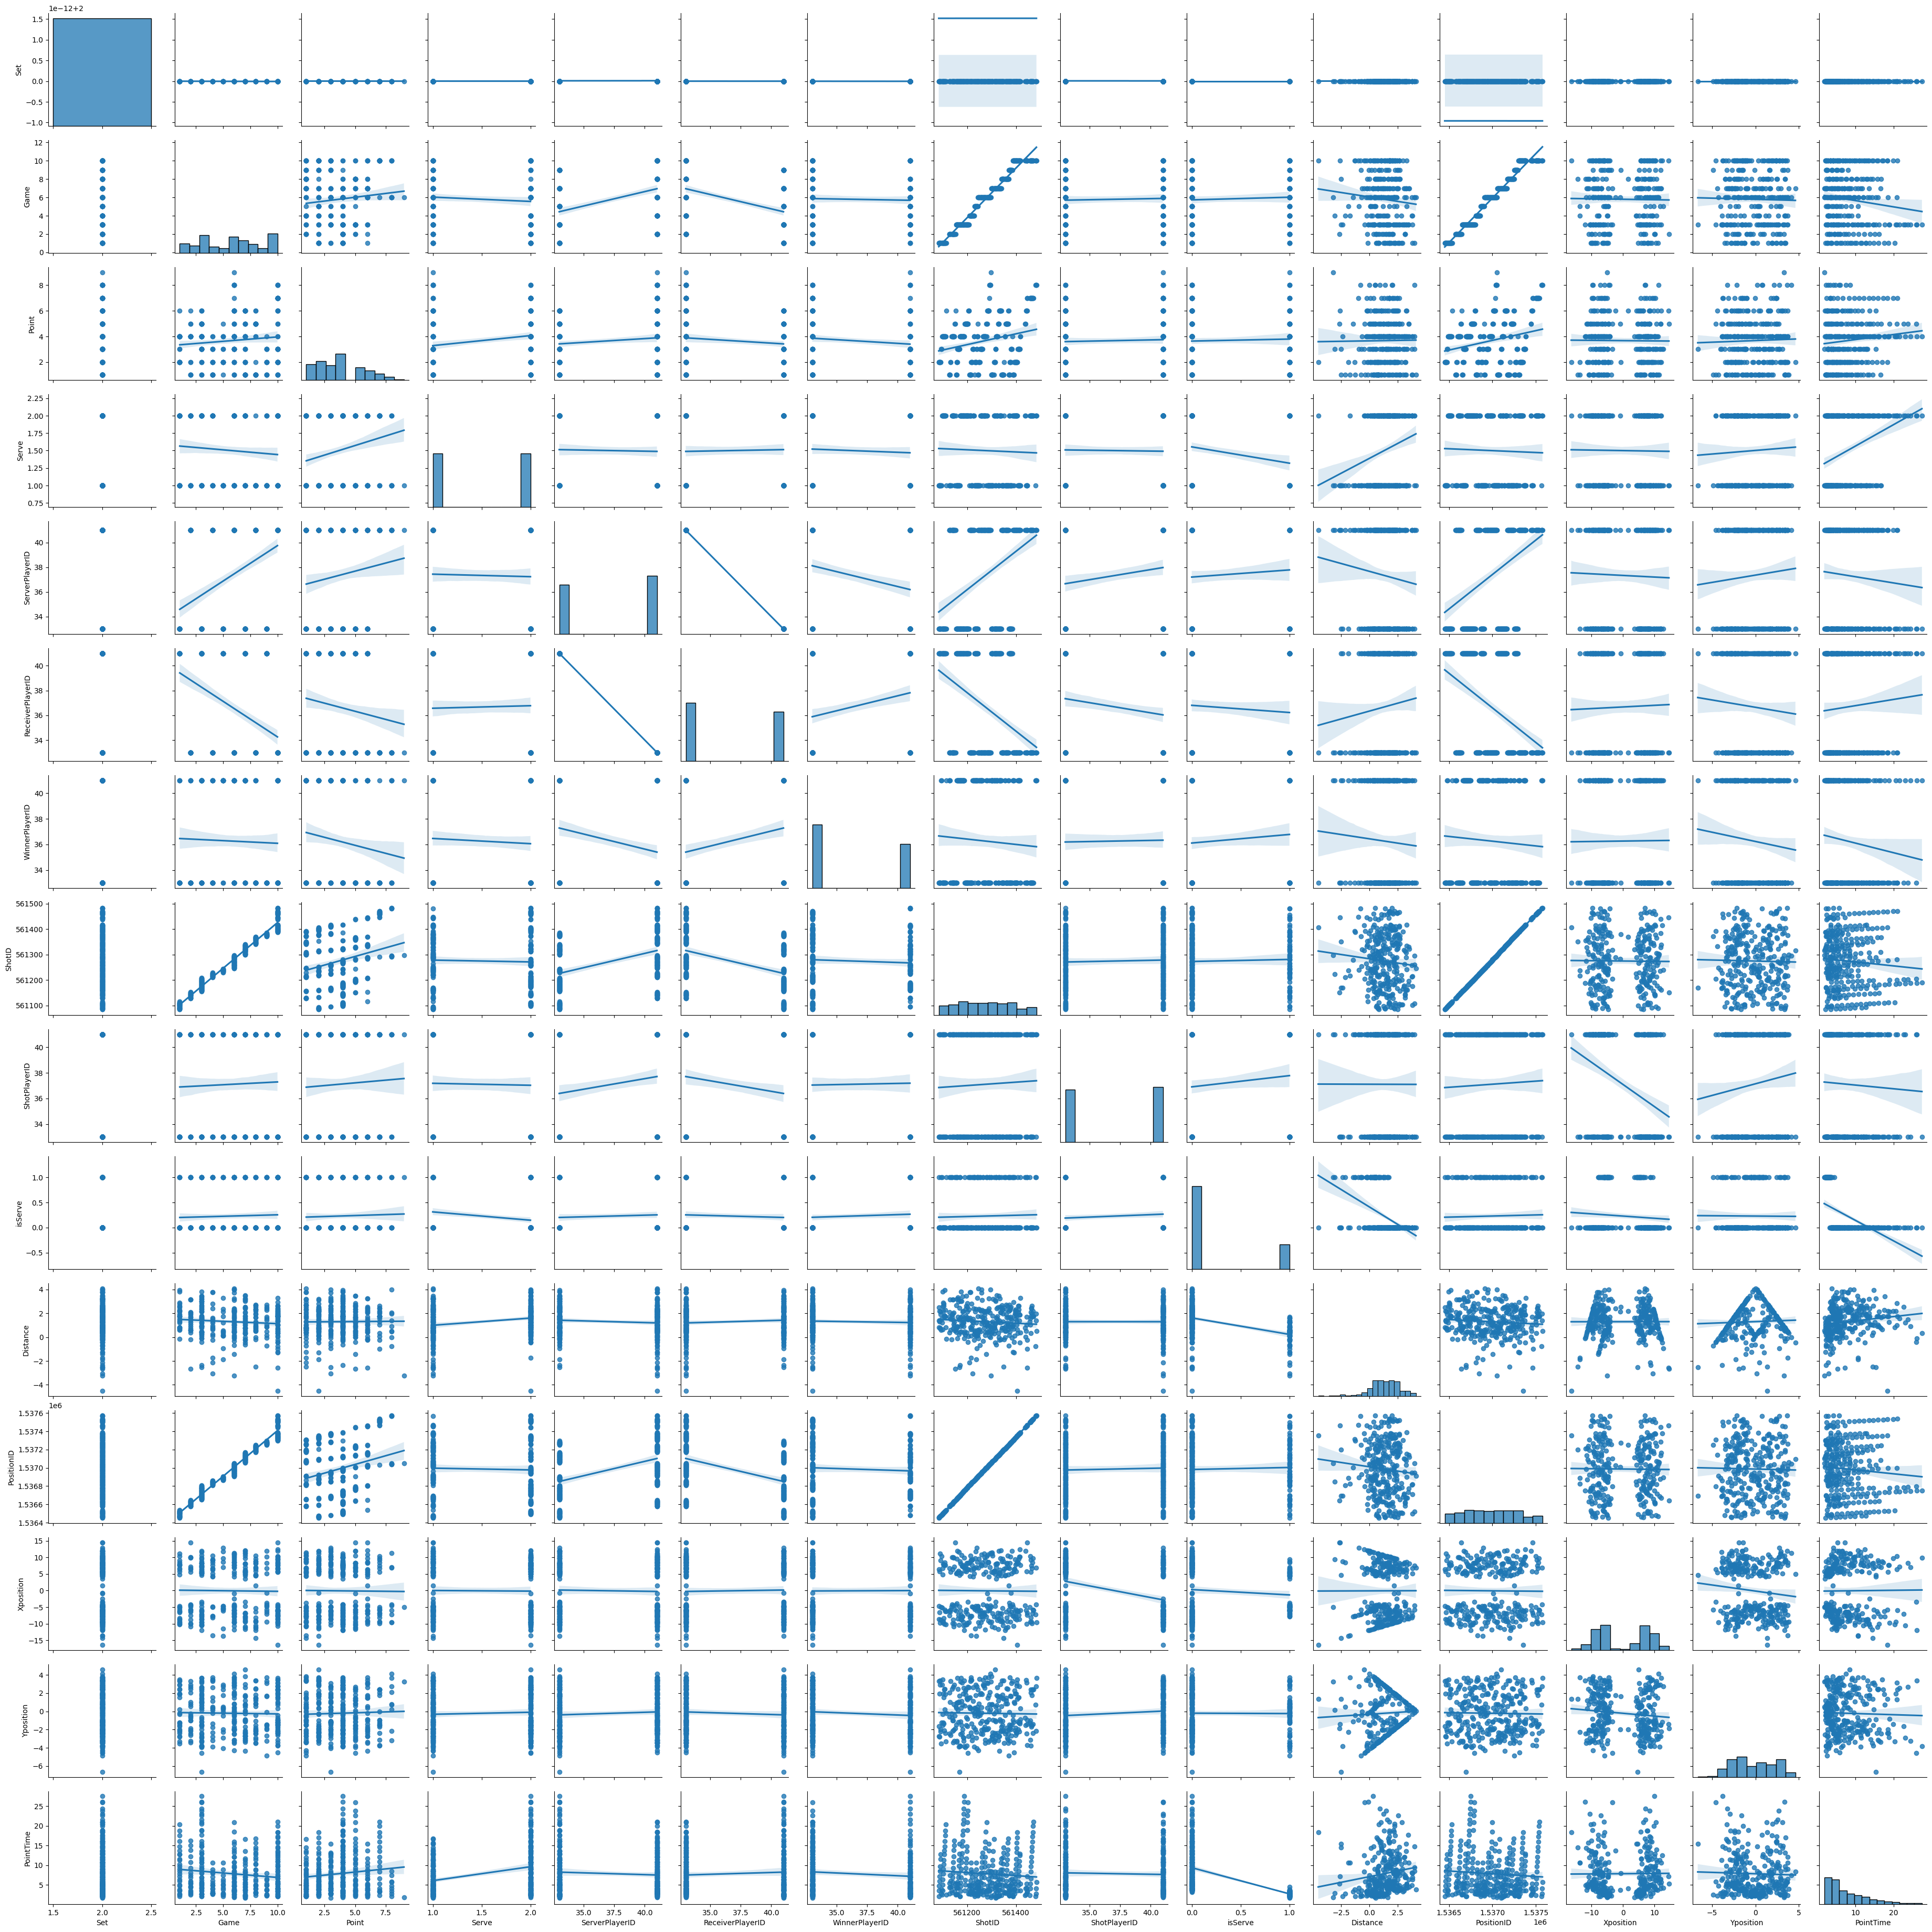

In [10]:
sns.pairplot(df,palette='rainbow',kind='reg')

**Metric Analysis**

In [12]:

# Compute the number of times a shot fell within a range of -11.887 to 11.887 for X position
x_position_range_count = df[(df['Xposition'] >= -11.887) & (df['Xposition'] <= 11.887)].groupby('ShotPlayerID').size()

# Compute the number of times a shot fell within a range of 4.115 to -4.115 for Y position
y_position_range_count = df[(df['Yposition'] >= -4.115) & (df['Yposition'] <= 4.115)].groupby('ShotPlayerID').size()

# Compute the weighted average of x_position_range_count and y_position_range_count
total_shots_count = df.groupby('ShotPlayerID').size()
weighted_average = (x_position_range_count + y_position_range_count) / (2 * total_shots_count)

# Display the results
result_df = pd.DataFrame({
    'XPosition_Range_Count': x_position_range_count,
    'YPosition_Range_Count': y_position_range_count,
    'Sideline Accuracy': weighted_average
}).reset_index()

print(result_df)


   ShotPlayerID  XPosition_Range_Count  YPosition_Range_Count  \
0            33                    143                    147   
1            41                    157                    159   

   Sideline Accuracy  
0           0.947712  
1           0.981366  


In [13]:
import pandas as pd

# Assuming the data is stored in a DataFrame named 'df'
# You may need to replace 'df' with the actual variable name of your DataFrame

# 1. Compute the number of times a shot fell within a range of -11.887 to 11.887 for X position divided by the number of counts
x_range_count = ((df['Xposition'] >= -11.887) & (df['Xposition'] <= 11.887)).groupby(df['ShotPlayerID']).mean()

# 2. Compute the number of times a shot fell within a range of 4.115 to -4.115 of the Y coordinate
y_range_count = ((df['Yposition'] >= -4.115) & (df['Yposition'] <= 4.115)).groupby(df['ShotPlayerID']).mean()

# 3. The number of times a shot fell within the service boundary of the X coordinate from 6.401 to -6.401
service_boundary_count = ((df['Xposition'] >= -6.401) & (df['Xposition'] <= 6.401)).groupby(df['ShotPlayerID']).mean()

# 4. Compute the weighted average of 1 and 2
weighted_avg_1_2 = (x_range_count + y_range_count) / 2

# 5. Compute the average of 2 and 3
avg_2_3 = (y_range_count + service_boundary_count) / 2

# Display the results
result_df = pd.DataFrame({
    'X Range Count': x_range_count,
    'Y Range Count': y_range_count,
    'Service Boundary Count': service_boundary_count,
    'Sideline_Accuracy': weighted_avg_1_2,
    'Updated_Sideline_Accuracy': avg_2_3
})

print(result_df)


              X Range Count  Y Range Count  Service Boundary Count  \
ShotPlayerID                                                         
33                 0.934641       0.960784                0.366013   
41                 0.975155       0.987578                0.322981   

              Sideline_Accuracy  Updated_Sideline_Accuracy  
ShotPlayerID                                                
33                     0.947712                   0.663399  
41                     0.981366                   0.655280  


Building a logistic regression to identify important predictors for result(whether shot ended up in boundary or out of boundary


In [15]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix,ConfusionMatrixDisplay, precision_recall_fscore_support, precision_score, recall_score
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [16]:
# Check value counts for the target variable, result.

df['Result'].value_counts()

IN     277
OUT     37
Name: Result, dtype: int64

In [17]:
# check percentage of counts for the target variable, Result
df['Result'].value_counts(normalize = True)

IN     0.882166
OUT    0.117834
Name: Result, dtype: float64

<Axes: >

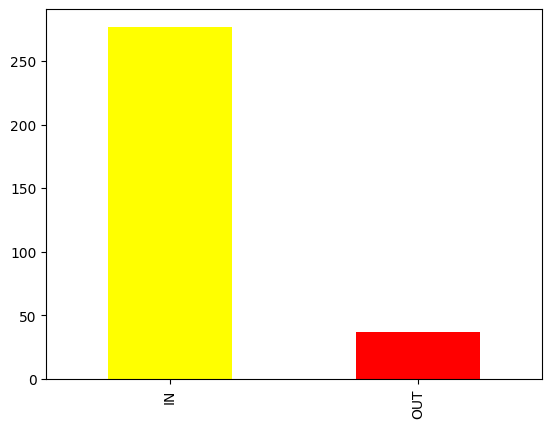

In [18]:
# Bar Graph
df['Result'].value_counts().plot.bar(color=['yellow','red'])

As we can see from the bar chart above, this dataset has two classes: In and Out. The two labels are imbalanced. For tennis lovers, we mostly want the shot to hit the within the boundaries , so we could build a machine learning model to help us know which features contribute greatly to a shot ending up within the assigned boundaries.

We have two labels meaning, we can build our logistic regression model.


 Logistic regression estimates the probability of an event occurring, such as shot in or shot out , based on a given dataset of independent variables. Since the outcome is a probability, the dependent variable is bounded between 0 and 1. In logistic regression, a logit transformation is applied on the odds—that is, the probability of success divided by the probability of failure.


 **Feature Engineering**

In [20]:
X_raw = df[['Distance','Xposition','Yposition','PointTime']]
y_raw = df['Result']

Fortunately, all selected X variables for the model are numeric so we just need to scale them. No Dummy Encoding.


In [21]:
# Create a MinMaxScaler object
scaler = MinMaxScaler()


In [22]:
# Scaling the raw input features
X = scaler.fit_transform(X_raw)

In [23]:
print(f"The range of feature inputs are within {X.min()} to {X.max()}")

The range of feature inputs are within 0.0 to 1.0


For the target variable y, let's use the LabelEncoder provided by sklearn to encode its two class values.

In [24]:
# Create a LabelEncoder object
label_encoder = LabelEncoder()
# Encode the target variable
y = label_encoder.fit_transform(y_raw.values.ravel())
# Note that ravel() function flattens the vector.
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0,

The encoded target variable will only contain values 0 = IN and 1 = OUT

In [25]:
np.unique(y, return_counts=True)

# Result confirms what has been seen in the past

(array([0, 1]), array([277,  37]))

**Train logistic regression models**


First, let's split the dataset into a training and a testing dataset. Training dataset will be used to train and (maybe) tune models, and testing dataset will be used to evaluate the models.

In [26]:
# First, let's split the training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state = 42)

Let's look at the shapes of the split datasets:

In [27]:
print(f"Training dataset shape, X_train: {X_train.shape}, y_train: {y_train.shape}")

Training dataset shape, X_train: (251, 4), y_train: (251,)


OK, now we have the training and testing datasets ready, let's start the model training task.

We first define a sklearn.linear_model.LogisticRegression model with the following arguments, you can check the comment for each argument for what it means.

In [28]:
# Create a logistic regression model
model = LogisticRegression()

# Fit the model on the training data
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

**Evaluate Model**

In [29]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix


# Accuracy
predictions = y_pred
accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy: {accuracy:.2f}")

# Precision, Recall, F1-score
precision = precision_score(y_test, predictions, average='weighted', zero_division=1)
recall = recall_score(y_test, predictions, average='weighted')
f1 = f1_score(y_test, predictions, average='weighted')

print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")



Accuracy: 0.89
Precision: 0.90
Recall: 0.89
F1 Score: 0.84


**Interpret logistic regression models**


One way to interpret logistic regression models is by analyzing feature coefficients. Although it may not be as effective as the regular linear regression models because the logistic regression model has a sigmoid function, we can still get a sense for the importance or impact of each feature.

We can check the coefficients for logistic regression model using its coef_ attribute:

In [30]:
model.coef_

array([[-4.90993411, -0.08908918, -0.54197018, -0.15545663]])

In [31]:
# Extract and sort feature coefficients
def get_feature_coefs(regression_model, label_index, columns):
    coef_dict = {}
    for coef, feat in zip(regression_model.coef_[label_index, :], columns):
        if abs(coef) >= 0.01:
            coef_dict[feat] = coef
    # Sort coefficients
    coef_dict = {k: v for k, v in sorted(coef_dict.items(), key=lambda item: item[1])}
    return coef_dict

# Generate bar colors based on if value is negative or positive
def get_bar_colors(values):
    color_vals = []
    for val in values:
        if val <= 0:
            color_vals.append('r')
        else:
            color_vals.append('g')
    return color_vals

# Visualize coefficients
def visualize_coefs(coef_dict):
    features = list(coef_dict.keys())
    values = list(coef_dict.values())
    y_pos = np.arange(len(features))
    color_vals = get_bar_colors(values)
    plt.rcdefaults()
    fig, ax = plt.subplots()
    ax.barh(y_pos, values, align='center', color=color_vals)
    ax.set_yticks(y_pos)
    ax.set_yticklabels(features)
    # labels read top-to-bottom
    ax.invert_yaxis()
    ax.set_xlabel('Feature Coefficients')
    ax.set_title('')
    plt.show()

In [32]:
# Get the coefficents for Class 1, Less Often
coef_dict_0 = get_feature_coefs(model, 0, X_raw)


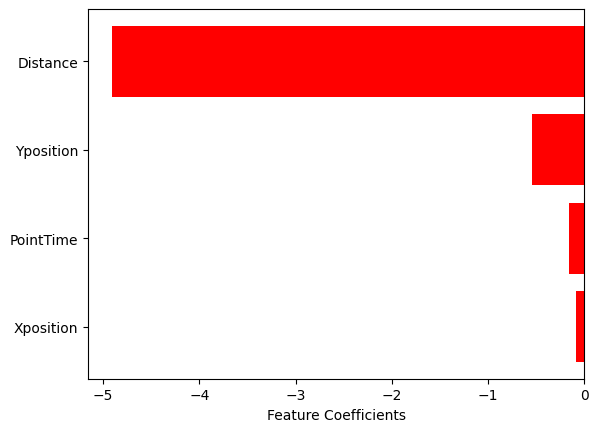

In [33]:
visualize_coefs(coef_dict_0)


# Distance of the shot had a great influence in determining whether a shot ended up in or not.

**Miscalleneous Graphs**

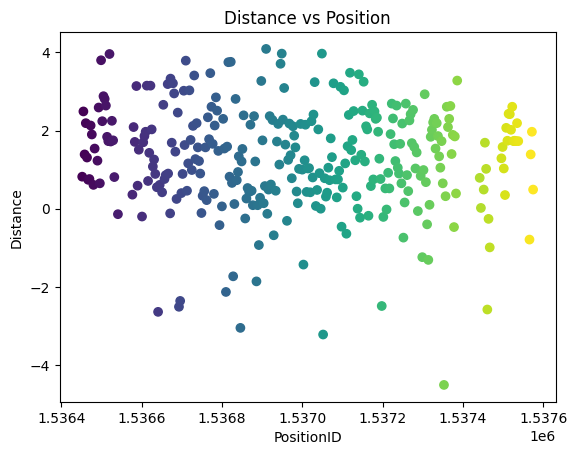

In [41]:
# @title Distance vs Position

import matplotlib.pyplot as plt
plt.scatter(df['PositionID'], df['Distance'], c=df['PositionID'])
plt.xlabel('PositionID')
plt.ylabel('Distance')
_ = plt.title('Distance vs Position')

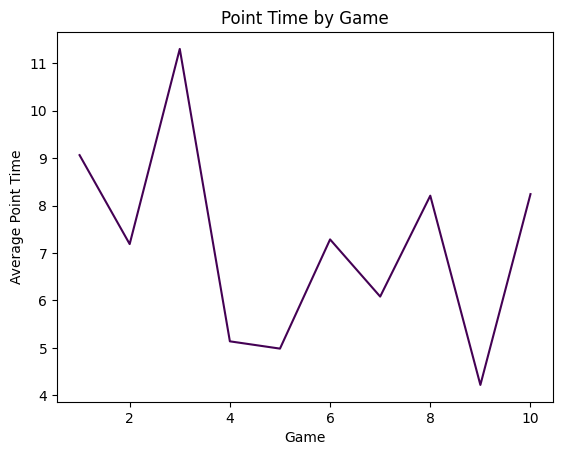

In [39]:
# @title Point Time by Game

import matplotlib.pyplot as plt
df.groupby('Game')['PointTime'].mean().plot(kind='line', colormap='viridis')
plt.xlabel('Game')
plt.ylabel('Average Point Time')
_ = plt.title('Point Time by Game')

<Axes: xlabel='Xposition', ylabel='Yposition'>

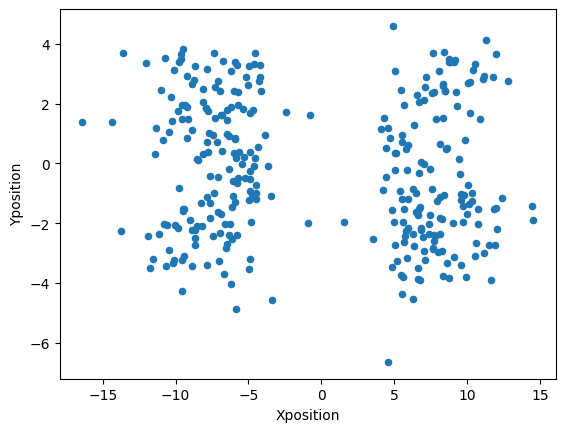

In [38]:
# @title Y vs X position

df.plot.scatter(x='Xposition', y='Yposition')

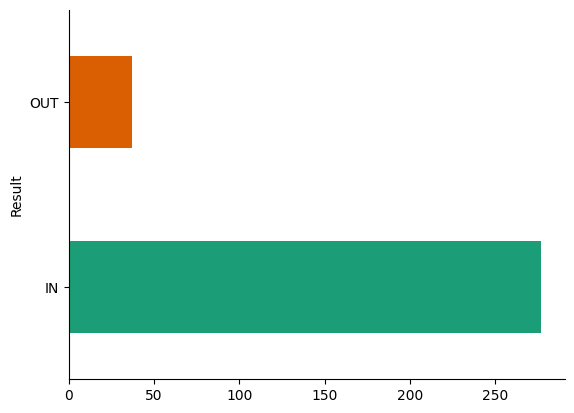

In [37]:
# @title Result

from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('Result').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

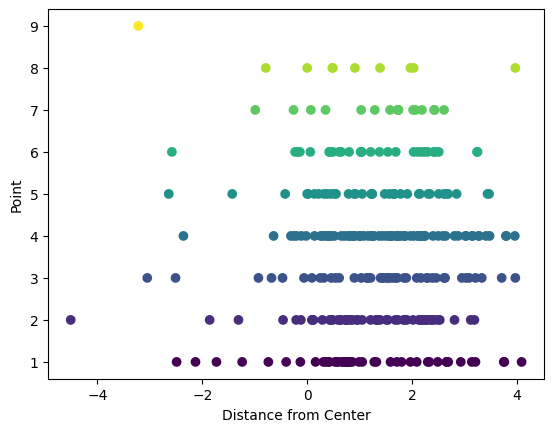

In [36]:
# @title Distance from Center vs Point

import matplotlib.pyplot as plt
plt.scatter(df['Distance'], df['Point'], c=df['Point'])
plt.xlabel('Distance from Center')
_ = plt.ylabel('Point')

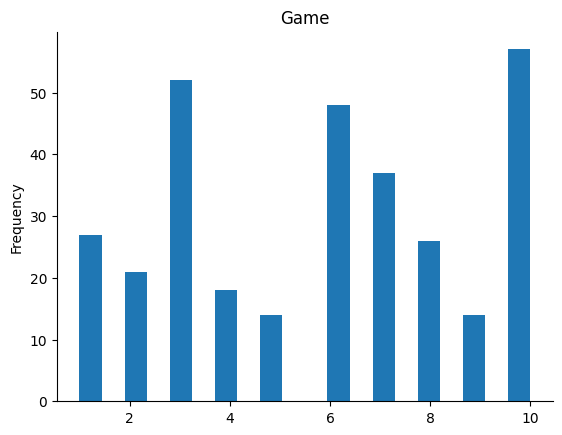

In [35]:
# @title Game

from matplotlib import pyplot as plt
df['Game'].plot(kind='hist', bins=20, title='Game')
plt.gca().spines[['top', 'right',]].set_visible(False)